In [99]:
import tensorflow  as tf
import numpy as np

In [11]:
from tensorflow.keras import models,layers

In [13]:
import matplotlib.pyplot as plt

In [14]:
IMAGE_SIZE =256

In [16]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32
)

Found 2152 files belonging to 3 classes.


In [18]:
classnames= dataset.class_names
classnames

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [20]:
type(dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

In [21]:
len(dataset)

68

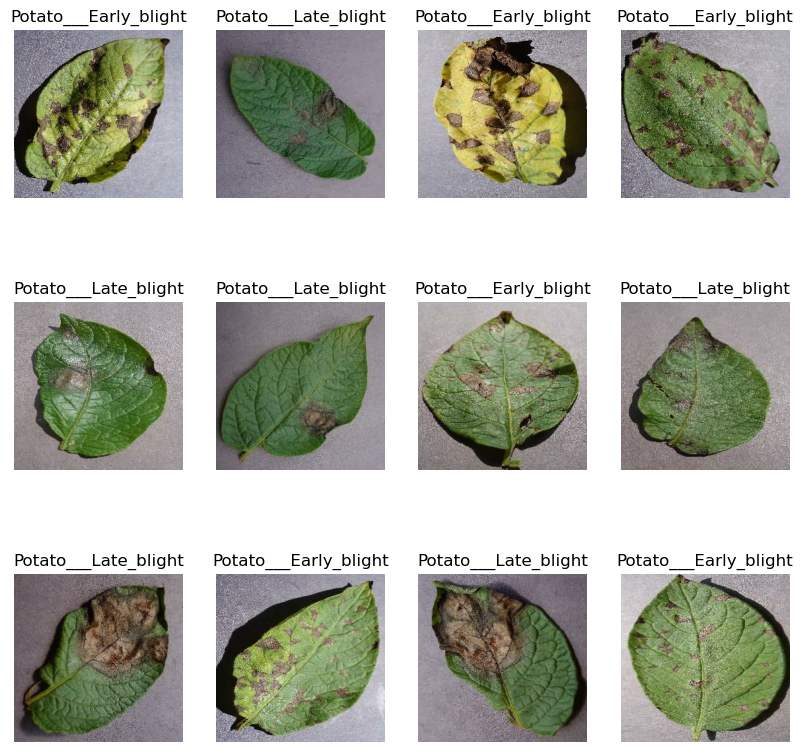

In [43]:
plt.figure(figsize=(10,10))


for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint16"))
        plt.axis("off")
        plt.title(classnames[label_batch[i]])

In [44]:
test_size = 0.8

In [45]:
len(dataset)*test_size

54.400000000000006

In [46]:
train_data = dataset.take(54)

In [47]:
test_data = dataset.skip(54)

In [50]:
val_ds = test_data.take(6)
len(val_ds)

6

In [49]:
test_data_act = test_data.skip(6)

In [53]:
train_data = train_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data_act = test_data_act.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [55]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [61]:
data_augumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2)
])

In [75]:
model = models.Sequential([
    resize_rescale,
    data_augumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,IMAGE_SIZE,IMAGE_SIZE,3)),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32,activation="relu"),
    layers.Dense(3,activation='softmax')
    
])

model.build(input_shape=(32,256,256,3))

In [76]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (256, 256, 3)             0         
                                                                 
 sequential_1 (Sequential)   (256, 256, 3)             0         
                                                                 
 conv2d_26 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [78]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [79]:
model.fit(
train_data,
epochs=10,
    batch_size=32,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
54/54 [==============================] - 208s 4s/step - loss: 0.6840 - accuracy: 0.6887 - val_loss: 0.4277 - val_accuracy: 0.8490
Epoch 2/10
54/54 [==============================] - 194s 4s/step - loss: 0.4152 - accuracy: 0.8345 - val_loss: 0.3764 - val_accuracy: 0.8229
Epoch 3/10
54/54 [==============================] - 190s 4s/step - loss: 0.2818 - accuracy: 0.8843 - val_loss: 0.4244 - val_accuracy: 0.8125
Epoch 4/10
54/54 [==============================] - 192s 4s/step - loss: 0.2605 - accuracy: 0.8935 - val_loss: 0.2339 - val_accuracy: 0.8802
Epoch 5/10
54/54 [==============================] - 184s 3s/step - loss: 0.1777 - accuracy: 0.9375 - val_loss: 0.2420 - val_accuracy: 0.8906
Epoch 6/10
54/54 [==============================] - 189s 3s/step - loss: 0.1820 - accuracy: 0.9369 - val_loss: 0.2674 - val_accuracy: 0.8698
Epoch 7/10
54/54 [==============================] - 178s 3s/step - loss: 0.1792 - accuracy: 0.9288 - val_loss: 0.1874 - val_accuracy: 0.9167
Epoch 8/10
54

In [85]:
score =model.evaluate(test_data_act)

8/8 [==============================] - 5s 582ms/step - loss: 0.0998 - accuracy: 0.9655


In [84]:
score

[0.09979008138179779, 0.9655172228813171]

1/1 [==============================] - 1s 685ms/step
80.67
1/1 [==============================] - 1s 719ms/step
83.0
1/1 [==============================] - 1s 714ms/step
94.74
1/1 [==============================] - 1s 700ms/step
100.0
1/1 [==============================] - 1s 705ms/step
100.0
1/1 [==============================] - 1s 767ms/step
93.66
1/1 [==============================] - 1s 712ms/step
99.32
1/1 [==============================] - 1s 700ms/step
74.64
1/1 [==============================] - 1s 711ms/step
99.59
1/1 [==============================] - 1s 813ms/step
88.08
1/1 [==============================] - 1s 741ms/step
100.0
1/1 [==============================] - 1s 759ms/step
99.7


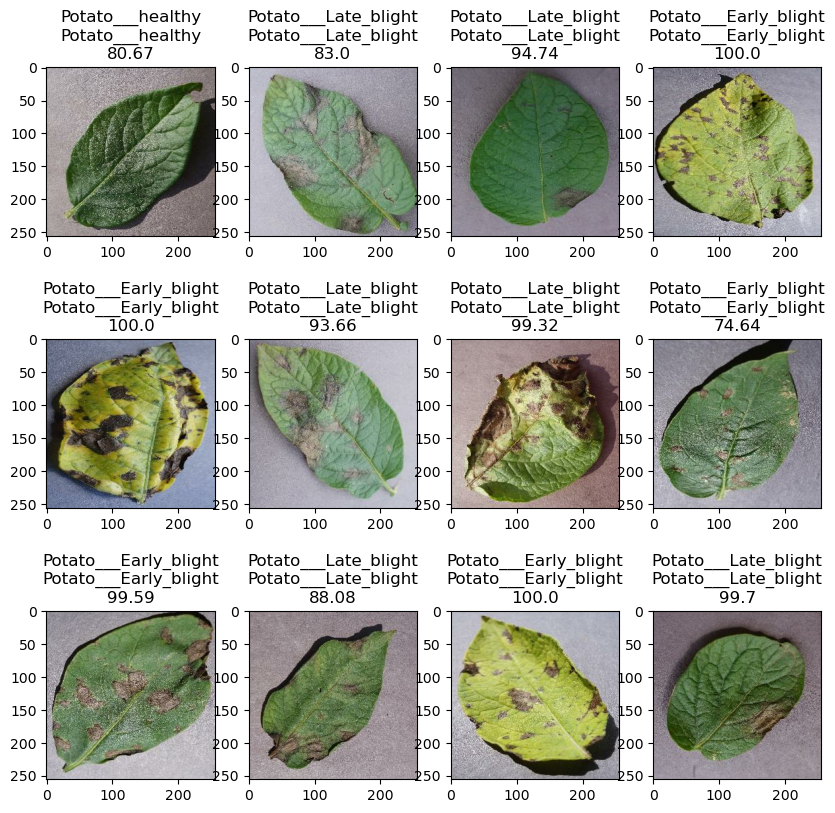

In [114]:
plt.figure(figsize=(10,10))

for images_batch,labels_batch in test_data.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(images_batch[i].numpy().astype('uint8'))
        batch_pred=model.predict(images_batch)
        accu=round(100*np.max(batch_pred[i]),2)
        print(accu)
        plt.title(classnames[labels_batch[i]]+"\n"+classnames[np.argmax(batch_pred[i])]+"\n"+str(accu))
       
   